# Exploring HCP Data

## Overview

The following are some general notes and code for interacting with the HCP data files I have selected for 'playing with' at the BIRS TDA workshop. 

Everything is being continually updated and improved. The latest version can always be obtained from the github repository

https://github.com/JohnGriffiths/BIRS_TminBNA_Workshop

---

The data folders are in a zip file 

`BIRS_TDA_HCP_data_VX.zip'

(where X is the version number)

---

To create a conda environment that will run this code:

```
conda create -n birs_tda nibabel 

pip install matplotlib pandas seaborn nilearn jupyter pyyaml scikit-learn

```

---

## Define some variables

In [1]:
data_dir =  '/media/sf_SharedFolder/Data/Banff_BIRS_Workshop_Data/data/hcp_100307'


t1_file = data_dir + '/MNINonLinear/T1w_restore.nii.gz'
t1b_file = data_dir + '/MNINonLinear/T1w_restore_brain.nii.gz'


aparcaseg_file = data_dir + '/MNINonLinear/aparc.a2009s+aseg.nii.gz'


meg_lh_f = data_dir + '/MEG/anatomy/100307.L.inflated.4k_fs_LR.surf.gii'

blpenv_file = data_dir + '/MEG/Restin/icablpenv/100307_MEG_3-Restin_icablpenv_whole.power.dtseries.nii'



meg_blpcy_w = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_whole.blpcorr.Yeo2011.pconn.nii'
meg_blpcy_t = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_theta.blpcorr.Yeo2011.pconn.nii'
meg_blpcy_d = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_delta.blpcorr.Yeo2011.pconn.nii'
meg_blpcy_a = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_alpha.blpcorr.Yeo2011.pconn.nii'
meg_blpcy_bl = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_betalow.blpcorr.Yeo2011.pconn.nii'

meg_blpca_w = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_whole.blpcorr.dconn.nii'
meg_blpca_t = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_theta.blpcorr.dconn.nii'
meg_blpca_d = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_delta.blpcorr.dconn.nii'
meg_blpca_a = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_alpha.blpcorr.dconn.nii'
meg_blpca_bl = data_dir + '/MEG/Restin/icablpcorr/100307_MEG_Restin_icablpcorr_betalow.blpcorr.dconn.nii'



meg_blpcys = {'whole':  meg_blpcy_w,
              'delta':  meg_blpcy_d,
              'theta':  meg_blpcy_t,
              'alpha':  meg_blpcy_a,
              'betalow': meg_blpcy_bl}

meg_blpcas = {'whole':  meg_blpca_w,
              'delta':  meg_blpca_d,
              'theta':  meg_blpca_t,
              'alpha':  meg_blpca_a,
              'betalow': meg_blpca_bl}



fmri_r_a_dts = data_dir + '/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_Atlas.dtseries.nii'

## Imports

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

import nibabel as nib

from nilearn.plotting import plot_anat,plot_stat_map,plot_roi,plot_surf

import pandas as pd
import numpy as np
import seaborn as sns


from moviepy.editor import ImageSequenceClip


## T1 Image

In [11]:
t1_img = nib.load(t1_file)

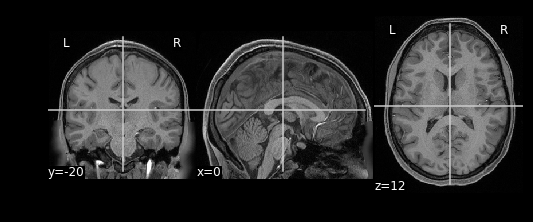

In [14]:
plot_anat(t1_img,dim=-1)

## Parc image

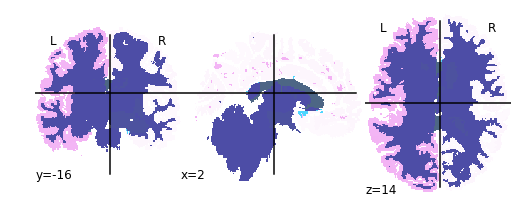

In [8]:
plot_roi(aparcaseg_file,bg_img=None)

## MEG resting time series data

load data

In [ ]:
blpenv_file = data_dir + '/MEG/Restin/icablpenv/100307_MEG_3-Restin_icablpenv_whole.power.dtseries.nii'

In [ ]:
img = nib.gifti.giftiio.read(blpenv_file)

dat = np.squeeze(img.get_data())

df = pd.DataFrame(dat)

In [54]:
df_mn = df.mean(axis=0)

In [55]:
df_dm = df - df_mn

'raw' time series data

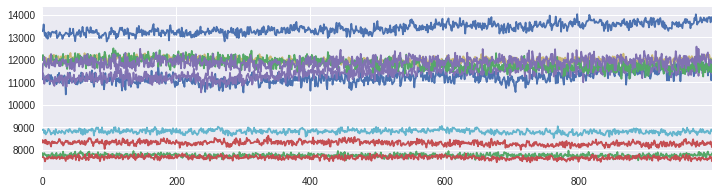

In [60]:
df.iloc[:1000,:10].plot(legend=False, figsize=(12,3))

de-meaned time series data

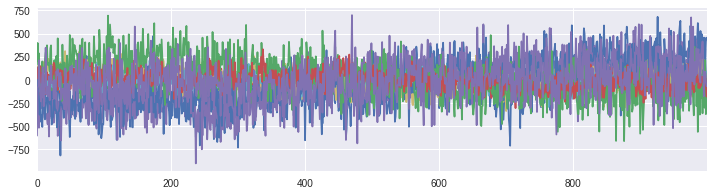

In [58]:
df_dm.iloc[:1000,:10].plot(legend=False,figsize=(12,3))

de-meaned time series on a brain surface

In [61]:
img = nib.load(meg_lh_f)
vtx,tri = img.darrays[0].data, img.darrays[1].data
df_dm_lh = df.iloc[:,:4002]

In [62]:
ts = range(0,1000,10)
fs = []
for t_it,t in enumerate(ts):
    toplot = df_dm_lh.ix[t].values 
    fname = '/tmp/test_pic_%s.png' %t_it
    fs.append(fname)
    plot_surf([vtx,tri],toplot,output_file=fname)

In [63]:
meg_dm_lh_seq = ImageSequenceClip(fs,fps=5)

In [64]:
meg_dm_lh_seq.ipython_display()

100%|██████████| 100/100 [00:17<00:00, 12.78it/s]


In [41]:
ts = range(0,1000,10)
fs = []
for t_it,t in enumerate(ts):
    toplot = df_lh.ix[t].values 
    fname = '/tmp/test_pic_%s.png' %t_it
    fs.append(fname)
    plot_surf([vtx,tri],toplot,output_file=fname)

In [42]:
meg_lh_seq = ImageSequenceClip(fs,fps=5)

In [43]:
meg_lh_seq.ipython_display()

100%|██████████| 100/100 [00:01<00:00, 51.76it/s]


In [ ]:
seq = ImageSequenceClip(fs,fps=5)

In [81]:
seq.ipython_display()

100%|██████████| 50/50 [00:01<00:00, 49.93it/s]


Yeo-atlas band-limited power correlation matrices

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


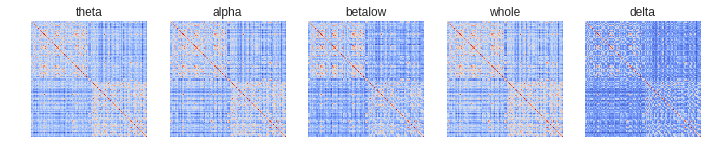

In [19]:
fig, ax = plt.subplots(ncols=5,figsize=(12,3))


for f_it,(k,v) in enumerate(meg_blpcys.items()):
    a = ax.ravel()[f_it]
    img = nib.gifti.giftiio.read(v)
    dat = np.squeeze(img.get_data())
    a.imshow(dat,cmap='coolwarm')
    a.set_title(k)
    a.axis('off')

Full source space band-limited power correlation matrix

(-0.5, 8003.5, 8003.5, -0.5)

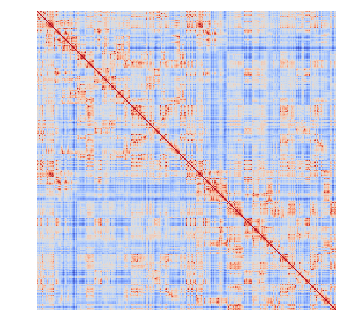

In [26]:
fig, ax =plt.subplots()

f = meg_blpca_w
img = nib.gifti.giftiio.read(f)
dat = np.squeeze(img.get_data())
ax.imshow(dat,cmap='coolwarm')
ax.axis('off')

In [25]:
#fig, ax = plt.subplots(ncols=5,figsize=(12,3))


#for f_it,(k,v) in enumerate(meg_blpcas.items()):
#    a = ax.ravel()[f_it]
#    img = nib.gifti.giftiio.read(v)
#    dat = np.squeeze(img.get_data())
#    a.imshow(dat,cmap='coolwarm')
#    a.set_title(k)
#    a.axis('off')

## fMRI data

*coming shortly...*